In [1]:
from matplotlib import animation, rc
import matplotlib.pyplot as plt
plt.style.use('dark_background')

# note that ffmpeg must be installed on your system
# this is tested on linux (not sure if it works on windows)
mpl.rcParams['animation.ffmpeg_path'] = '/usr/local/bin/ffmpeg'
plt.rcParams['animation.ffmpeg_path'] = '/usr/local/bin/ffmpeg'

## define a function to make a figure
the animation works by updating this on every frame

In [2]:
def make_figure(t_now, t, y, ax, t_before=0.25, t_after=0.25):
    '''
    function to plot on an an axis
    inputs:
        t_now: current time
        t: time array
        y: array of y values
        ax: axis to plot on
        t_before: time before current time to show
        t_after: time after current time to show
    '''
    ax.plot(t,y,color='lightpink',linewidth=3)
    ax.set_xlim(t_now - t_before, t_now + t_before)
    ax.set_xlabel('time',color='white')
    ax.set_ylabel('some value',color='white')
    ax.set_title('current time = {:0.2f}'.format(t_now),color='red')

## define an update function
The animation function calls this on every frame. It subsequently calls the make_figure function

In [3]:
def update(frame_number):
    '''
    method to update figure
    animation class will call this
    
    the print statement is there to help track progress
    '''
    t_now = t[frame_number]
    make_figure(t_now, t, y, ax)
    print('on frame {} of {}'.format(frame_number+1,len(t)), end='\r')

## set up t and y, define the writer

In [4]:
t = np.arange(0,1,0.001)
y = np.sin(20*np.pi*t) + np.cos(30*np.pi*t)

fps = 10
writer = animation.FFMpegFileWriter(
    fps=fps,
    codec='mpeg4',
    bitrate=-1,
    extra_args=['-pix_fmt', 'yuv420p', '-q:v', '5']
)

## make the figure, set up the animation, save it
it will write all of the frames to the current folder, then stitch them into a movie once done  
~30 seconds on my machine for this example

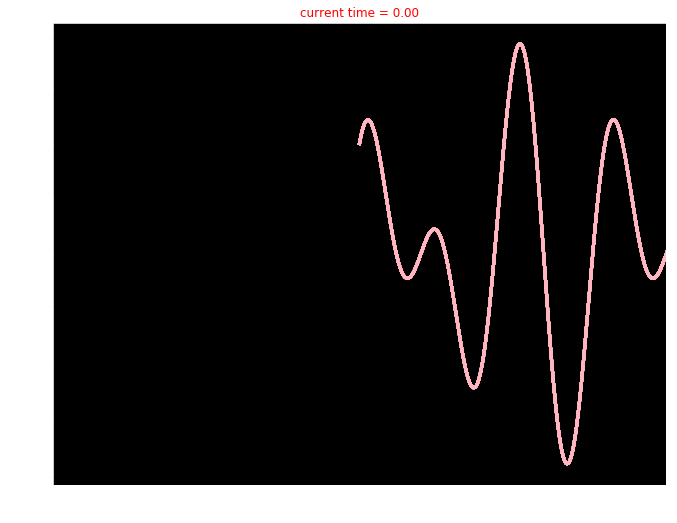

In [8]:
fig, ax = plt.subplots(figsize=(11, 8.5))

frames = np.arange(0,len(t),10) #subsample by a factor of 10

a = animation.FuncAnimation(
    fig,
    update,
    frames=frames,
    interval=1/fps*1000,
    repeat=False,
    blit=False
)

save_folder = '/home/dougo/dropbox/share'
a.save(
    os.path.join(save_folder, 'test_output_movie.mp4'),
    writer=writer
)